## Missing Values

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
## Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.shape

(891, 15)

In [7]:
# Delete the row of data points
df.dropna().shape

(182, 15)

In [8]:
## column wise deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


<Axes: >

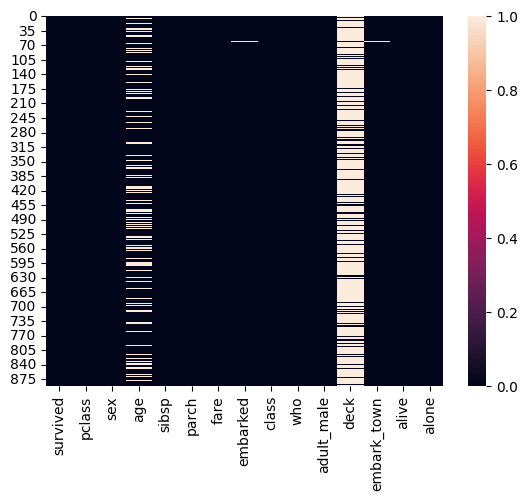

In [9]:
sns.heatmap(df.isnull())

## Imputation Missing Values

### 1- Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

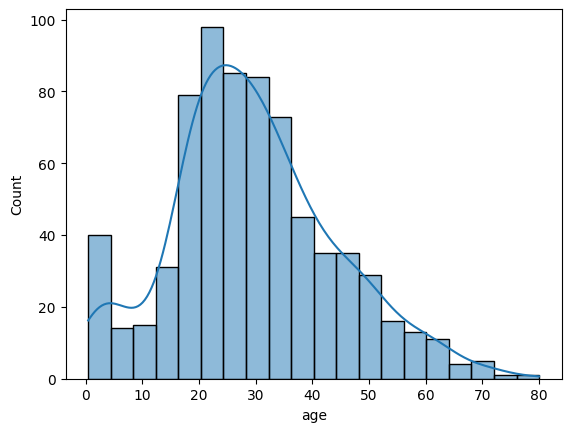

In [10]:
sns.histplot(df['age'],kde=True)

In [11]:
df['age'].mean()

np.float64(29.69911764705882)

In [12]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


<Axes: >

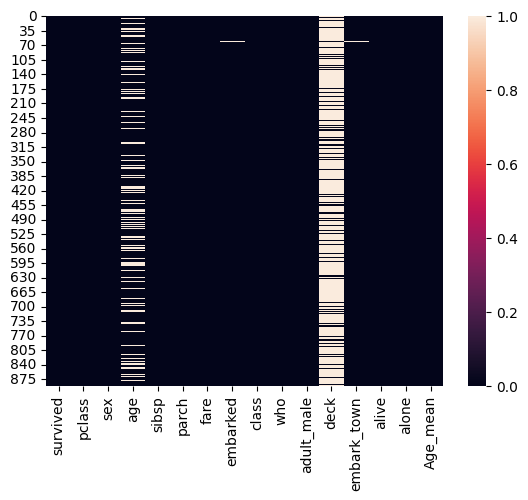

In [14]:
sns.heatmap(df.isnull())

In [15]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='Age_mean', ylabel='Count'>

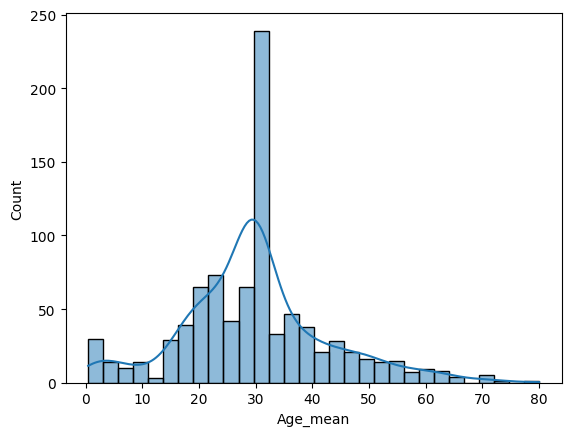

In [16]:
sns.histplot(df['Age_mean'],kde=True)

In [17]:
## Mean Imputation Works Well when we have normally distributed data.

## 2. Median Value Imputation
## If we have outliers in the dataset------use Median

In [18]:
df['Age_median'] = df['age'].fillna(df['age'].median())

<Axes: xlabel='Age_median', ylabel='Count'>

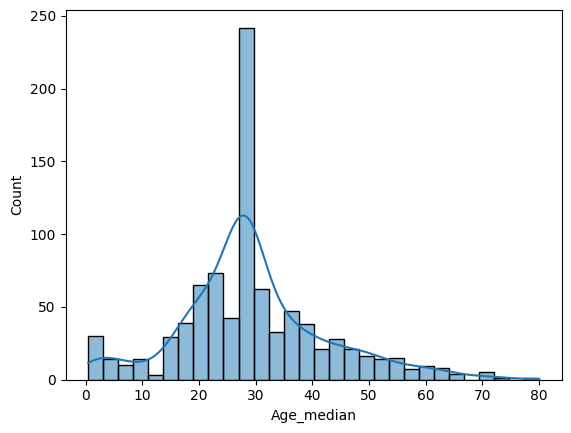

In [19]:
sns.histplot(df['Age_median'],kde=True)

In [20]:
df[['Age_mean','Age_median','age']]

,Age_mean,Age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


## 3. Model Imputation Technique ---- Categorical

In [25]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [26]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64